<a href="https://colab.research.google.com/github/estebanhernandezr/DNA-compression/blob/main/Entropy_revisited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from typing import BinaryIO, Dict, Sequence, Tuple
import numpy as np
from math import log
import matplotlib.pyplot as plt
import string
import random

#Entropy

##Hyper-parameters

In [ ]:
base = 2
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',' k', 'l', 'm',
            'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'y', 'z']

##Entropy by *Ralph Hartley* (1928)
A quantitative measure of information was presented in *Bell System Technical
Journal* already 1928 by *Ralph Hartley*: *the information content*, $I_H$, in a
message consisting of $n$ characters, each of them chosen from an alphabet
of $N$ different symbols, should be proportional to the length $n$ multiplied
by some function of the size of the alphabet, $f(N)$, so that $I_H = nf(N)$.

The functional form of *the information content* is supported by the argument that if the message is coded using an alphabet of different size $N_0$ resulting in another length $n_0$, then *the information content* should not change: $I_H = n_0f(N_0)$. The function $f$ that preserves the *information content* is $log_K$, where $K$ is an arbitrary base of the logarithm: different $K$ just results in a scaling of *the information content*.

Therefore, *Ralph Hartley* formulated *the information content* as
$$I_H(n,N)=n\,log_{K}(N),$$
where $n$ is the length of the message and $N$ is the cardinality of the alphabet.


In [ ]:
def Message_Hartley_Entropy(message: str, alpha: int) -> float:
    entropy_per_message: float = len(message)*log(alpha, base)
    return entropy_per_message

def Symbol_Hartley_Entropy(message: str, alpha: int) -> float:
    entropy_per_message: float = len(message)*log(alpha, base)
    entropy_per_symbol: float = entropy_per_message/len(message)
    return entropy_per_symbol

*Hartley*'s approach, nonetheless, builds upon the worst case escenario: all symbols are equally likely to appear next in the sequence, as we may witness with the *Shannon's information content (generalized) formulation*, in the next subsection.

As a matter of fact, the *Hartley's information content* does not depend on the sequence itself, but only on its lenght and the length of the alphabet it was written with: really, not even on the symbols themselves. Indeed, we could have omitted passing the message string to the *Message_Hartley_Entropy* and *Symbol_Hartley_Entropy* functions, as a parameter: it's up to the programmer.

The previous is illustrated below.

**FACT**: Whenever we generate a random sequence of characters, taken from any alphabet, we will always get the same value for the *Hartley's information content* measure, as long as the length of the sequence stays the same as well as the length of the alphabet.

Try it yourself...

In [79]:
n = 100
print('length of the message:', n)
print('size of the alphabet:', len(string.ascii_letters), end='\n\n')

cad = ''.join(random.choice(string.ascii_letters) for _ in range(n))
print('sequence:', cad, end='\n\n')
print('message entropy:', Message_Hartley_Entropy(cad, len(alphabet)))
print('symbol entropy:', Symbol_Hartley_Entropy(cad, len(alphabet)))

length of the message: 100
size of the alphabet: 52

sequence: NpTriHrVPYwaIKfYilxDuzBmhCbumzKpTXvSEEuzMcNdUoaSxpJRrhlOgjOOjrfzqnCMCIFkVSgONnVSbIeQHyofmhzBjhtPueyx

message entropy: 464.38561897747246
symbol entropy: 4.643856189774724


Yet, there are a few things worth noting about *Hartley's information content*...

Given that the length of the message and the length of the alphabet are the only parameters to it, one may ask: ¿What if the length of the message varies? otherwise ¿What if the length of the alphabet varies?

A variable length of alphabet can be coded as follows:

In [88]:
Message_Hartley_Entropies = []
Symbol_Hartley_Entropies = []

n = 100

cad = ''.join(random.choice(string.ascii_letters) for _ in range(n))
for i in range(1, 1000, 1):
    Message_Hartley_Entropies.append(Message_Hartley_Entropy(cad, i))
    Symbol_Hartley_Entropies.append(Symbol_Hartley_Entropy(cad, i))

Note that we fixed the message length, while the message can be anything, its size is always $n$. On the other side, the length of the alphabet passed to the function varies with the for-loop variable.

When the length of the alphabet varies, the next is what we get:

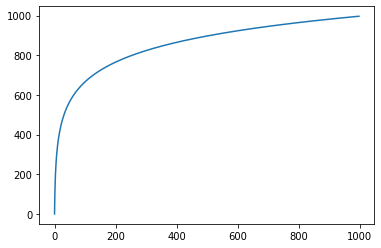

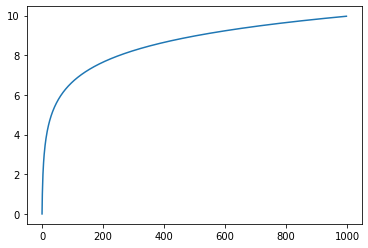

In [90]:
plt.plot(Message_Hartley_Entropies)
plt.show()
plt.plot(Symbol_Hartley_Entropies)
plt.show()

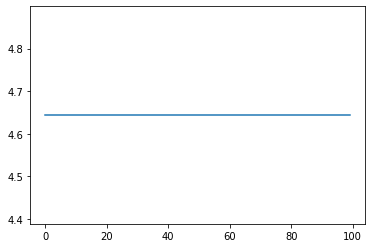

In [ ]:
plt.plot(Symbol_Hartley_Entropies)

##Entropy by *Claude Shannon* (1948)